# Mini-project 3
Assess characteristics of applicants that will be more likely to use a pre-paid card.
## Group 1

In [1]:
# imports
import pandas as pd

In [37]:
# Read the data
data = pd.read_csv('CFPB-financial-wellness-data.csv')
data

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,7,7,7,59,3,4,2,...,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,5,6,6,59,3,4,3,...,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,5,5,5,46,2,2,3,...,1,4,9,0,0,0,0,2,0,1.224941


In [38]:
data = pd.read_csv('CFPB-financial-wellness-data.csv')
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
data.drop(['finalwt', 'PUF_ID', 'sample'], axis = 1 , inplace=True)
data_pred = data.drop(['PRODUSE_3'], axis = 1 )

X_train, X_test, y_train, y_test = train_test_split(data_pred, data['PRODUSE_3'], test_size=0.2)

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize an empty list to store selected features
selected_features = []

# Define a function to calculate accuracy of the model
def get_accuracy(X_train, X_test, y_train, y_test):
    # Train a logistic regression model
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Loop over all features and add them to the list one by one based on accuracy improvement
for i in range(X_train.shape[1]):
    best_accuracy = 0
    best_feature = None
    for feature in range(X_train.shape[1]):
        if feature not in selected_features:
            # Add the feature to the list
            features = selected_features + [feature]

            # Calculate accuracy of the model with the selected features
            accuracy = get_accuracy(X_train.iloc[:, features], X_test.iloc[:, features], y_train, y_test)

            # If the accuracy is better than the best accuracy so far, update the best feature and best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

    # Add the best feature to the selected features list
    selected_features.append(best_feature)
    
    
    # Print the selected features and accuracy of the model
    print("Selected features:", selected_features)
    print("Accuracy:", best_accuracy)
    if len(selected_features) == 20:
        break

Selected features: [0]
Accuracy: 0.9124315871774824
Selected features: [0, 1]
Accuracy: 0.9124315871774824
Selected features: [0, 1, 2]
Accuracy: 0.9124315871774824
Selected features: [0, 1, 2, 3]
Accuracy: 0.9124315871774824


KeyboardInterrupt: 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('PRODUSE_3', axis=1), data['PRODUSE_3'], test_size=0.2)

In [5]:
X_train.shape[1]

216

In [7]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

sfs = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=20, scoring='accuracy')
sfs.fit(X_train, y_train)

# Print the selected features
print('Selected features:', sfs.get_support(indices=True))

/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

KeyboardInterrupt: 

In [4]:
data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [13]:
# ignore the survey weights
data.drop(['finalwt'], axis=1, inplace=True)

# drop other columns that make no sense
data.drop(['PUF_ID', 'sample'], axis=1, inplace=True)


In [21]:
target = data[['PRODUSE_3']]
predictor = data.drop(['PRODUSE_3'], axis=1)
# predictor = 'card' #20

In [19]:
predictor

0       0
1       0
2       1
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    1
Name: PRODUSE_3, Length: 6394, dtype: int64

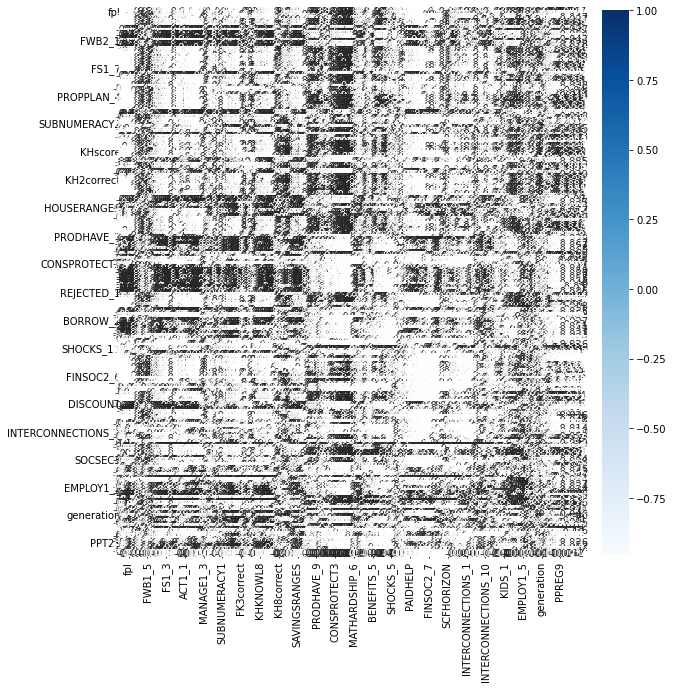

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.gcf().set_size_inches(10, 10)

In [82]:
# Random Forest, SVM, AdaBoost, Logit, XGABoost, ANN
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# split the data into train and test
# TODO: Include hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(predictor, target,
                                                    test_size=0.2, random_state=42)
# create the model
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# fit the model
rf.fit(X_train, y_train)
# predict
y_pred = rf.predict(X_test)
# accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))
# confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
# classification report
print('Classification Report: ', classification_report(y_test, y_pred))
# ROC
print('ROC: ', roc_auc_score(y_test, y_pred))
# Precision-Recall
print('Precision-Recall: ', average_precision_score(y_test, y_pred))
# Precision-Recall Curve
print('Precision-Recall Curve: ', precision_recall_curve(y_test, y_pred))
# ROC Curve
print('ROC Curve: ', roc_curve(y_test, y_pred))
# AUC
# print('AUC: ', auc(y_test, y_pred))
# vif
#calculating VIFs (variance inflation factors)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# # Load the dataset
# data = pd.read_csv("mydata.csv")

# # Fit a multiple regression model
# X = data.drop(columns=["outcome_variable"])
# y = data["outcome_variable"]
model = sm.OLS(target, predictor).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = predictor.columns
vif["VIF"] = [variance_inflation_factor(predictor.values, i) for i in range(predictor.shape[1])]

# Print variables with high VIF values

print(vif[vif["VIF"] > 5])

ValueError: Found input variables with inconsistent numbers of samples: [6394, 9]

TypeError: len() of unsized object

In [51]:
# RIDGE regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Create a dictionary of alpha values: alphas
alphas = np.linspace(0.1, 10, 100)

# Create a ridge grid search object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5)

# Fit it to the data
ridge_cv.fit(predictor, target)

# Print the optimal parameters and best score
print("Tuned Ridge Alpha: {}".format(ridge_cv.best_params_))

# plot the ridge coefficients as a function of the regularization
plt.plot(alphas, ridge_cv.best_estimator_.coef_)

/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

Tuned Ridge Alpha: {'alpha': 0.1}


/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (100,) and (1, 213)

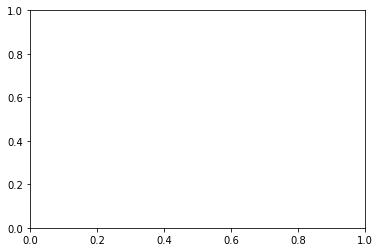

In [52]:
plt.plot(alphas, ridge_cv.best_estimator_.coef_)

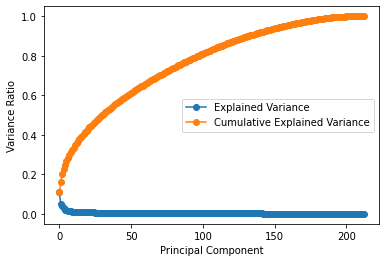

/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


InvalidIndexError: (slice(None, None, None), 0)

In [48]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# load the data into a pandas DataFrame
# data = pd.read_csv('data.csv')

# select the columns for the PCA analysis
X = predictor

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA analysis
pca = PCA()
pca.fit(X_scaled)

# compute the explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# plot the explained variance and cumulative explained variance
import matplotlib.pyplot as plt
plt.plot(explained_variance, 'o-', label='Explained Variance')
plt.plot(cumulative_variance, 'o-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.legend()
plt.show()

# select the number of components to retain
n_components = 2 # for example
from matplotlib.colors import ListedColormap

# transform the data to the selected number of components
X_pca = pca.transform(X_scaled)[:,:n_components]
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()

/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

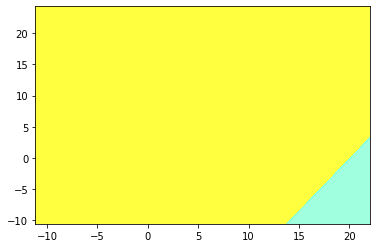

In [49]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# importing or loading the dataset
# dataset = pd.read_csv('wine.csv')

# distributing the dataset into two components X and Y
X = predictor
y = target

# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


In [50]:
X_set

array([[ 1.74794745,  3.10689552],
       [ 6.51392347,  1.24991768],
       [ 3.33347677,  4.44705428],
       ...,
       [ 5.41422403, -0.50086973],
       [ 2.59916602,  0.4379041 ],
       [-5.36315464, -5.24326596]])

In [32]:
# PCA analysis to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(predictor)
pca.explained_variance_ratio_

array([0.25820731, 0.19229096])

ValueError: x and y must have same first dimension, but have shapes (8,) and (1, 2)

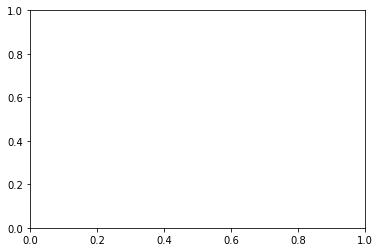

In [53]:
# fit lasso regression on model
from sklearn.linear_model import Ridge
# X_train, X_test, y_train, y_test = train_test_split(data[predictor].drop(target), data[target], test_size=0.2, random_state=42)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs, label=data.columns)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.legend(loc='upper right')
plt.title('Ridge coefficients as a function of alpha')

In [42]:
coefs

[array([[-3.32519695e-03, -4.44029707e-04,  1.84001098e-03,
         -1.44107547e-03,  4.77809314e-04,  2.84534481e-04,
          1.96064456e-03, -4.51165476e-04, -3.44524988e-04,
          2.56136476e-03,  1.34800713e-03,  2.23855425e-03,
          1.56426561e-03,  1.63046011e-03,  2.71997619e-04,
         -1.08688871e-03, -3.29767915e-03,  2.11124906e-03,
          4.22617128e-03, -7.73766686e-03,  2.31565523e-03,
         -2.30136752e-03,  1.04630958e-02, -3.44362003e-03,
          4.65827600e-03, -5.92590992e-03, -1.73132697e-03,
          6.57611051e-03,  2.42367168e-03,  1.12475028e-02,
         -1.37206108e-03,  4.55362022e-03, -6.63296981e-03,
          1.39947647e-03, -7.92153453e-03,  4.45170886e-03,
         -1.00389127e-03,  1.57140104e-03, -3.77934872e-04,
         -1.86044400e-03, -1.09042722e-03,  1.32584816e-03,
          2.30519768e-03, -1.26650404e-03, -2.94045269e-04,
          2.73920762e-04,  5.24345534e-04,  5.97535356e-03,
          2.81734646e-02,  2.83654695e-0

/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal alpha: 0.0037649358067924675


<ipython-input-44-b6858de832c5>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.drop(target, axis=1).columns, rotation=90)


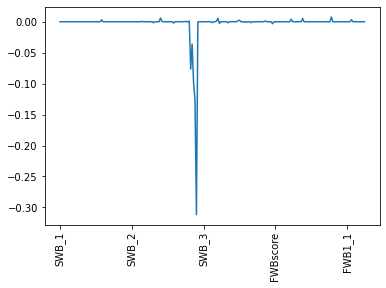

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the predictor variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the LassoCV model
alphas = np.logspace(-4, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Print the optimal alpha parameter
print(f'Optimal alpha: {lasso_cv.alpha_}')

# Train the Lasso model with the optimal alpha
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train_scaled, y_train)

# Get the coefficient values
coefs = lasso.coef_

# Plot the coefficient values
fig, ax = plt.subplots()
ax.plot(range(len(coefs)), coefs)
ax.set_xticklabels(data.drop(target, axis=1).columns, rotation=90)
plt.show()

# Standardise the data

In [69]:
# mean scaling
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('CFPB-financial-wellness-data.csv')
scaler = StandardScaler()
target = 'PRODUSE_3'
data.drop(['PUF_ID', 'finalwt', 'sample'], axis=1, inplace=True)
predictor = data.drop(target, axis=1).columns
X_train, X_test, y_train, y_test = train_test_split(data[predictor], data[target], test_size=0.2, random_state=42)
data_scaled = scaler.fit_transform(data)
# Subtracts the mean and divided by the standard deviation
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# Don't need to fit anymore because we are already using the fit values from the line above
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
# Replacing the lost column and index names
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values

In [70]:
X_test_scaled

,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,...,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL
6059,0.515886,-0.247652,-0.244701,0.970946,0.060207,-0.038107,-0.179328,0.404988,-0.277461,-0.606231,...,-0.746577,0.3919,1.310297,1.524478,5.344761,3.485556,2.577933,-0.373773,-0.101990,-3.737706
5132,0.515886,1.089276,1.056386,0.970946,0.556004,-0.038107,-0.179328,-1.277118,-0.277461,-1.396263,...,-0.746577,0.3919,-0.616167,-0.843366,-0.187099,-0.286898,-0.387908,-0.373773,2.358764,0.059237
4897,0.515886,0.420812,0.405842,-0.273295,1.760081,1.579449,1.615707,-1.277118,1.627524,-1.396263,...,-0.746577,0.3919,-0.616167,-0.448725,-0.187099,-0.286898,-0.387908,-0.373773,-0.101990,0.059237
4020,0.515886,-2.921508,1.056386,0.970946,-0.577245,-1.655663,1.615707,2.087095,-2.182447,1.763863,...,2.134406,0.3919,0.347065,0.340556,-0.187099,-0.286898,-0.387908,-0.373773,1.128387,0.818625
132,0.515886,-1.584580,-0.244701,0.348825,-0.577245,-0.846885,-1.076845,0.404988,-0.277461,0.183800,...,0.693914,0.3919,0.347065,-0.054085,-0.187099,-0.286898,-0.387908,-0.373773,-0.101990,0.818625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,0.515886,-0.247652,-0.895244,-0.273295,-1.356354,-1.655663,-1.076845,2.087095,-1.229954,-0.606231,...,1.414160,0.3919,0.347065,-0.054085,-0.187099,-0.286898,-0.387908,-0.373773,-0.101990,0.818625
3793,-2.548873,-0.247652,1.056386,0.970946,-1.498010,-0.846885,-1.974362,0.404988,-0.277461,1.763863,...,-0.746577,0.3919,1.310297,1.524478,-0.187099,3.485556,2.577933,2.675424,-0.101990,0.059237
1726,0.515886,-0.916116,-0.244701,0.348825,-1.073042,-0.846885,-0.179328,1.246041,-1.229954,0.973832,...,-0.746577,0.3919,0.347065,-0.054085,-0.187099,3.485556,-0.387908,-0.373773,-0.101990,0.818625
748,-2.548873,-0.247652,1.056386,0.970946,-1.285526,-0.846885,1.615707,2.087095,-0.277461,1.763863,...,1.414160,0.3919,0.347065,-0.054085,-0.187099,-0.286898,-0.387908,-0.373773,-0.101990,0.059237


# PCA

In [71]:
from sklearn.decomposition import PCA
import numpy as np
# create a PCA object with the desired number of components
pca = PCA(n_components=20)

# fit the PCA model to the data
pca.fit(X_train_scaled)

# transform the data to the new coordinate system
X_pca = pca.transform(X_train_scaled)

# the transformed data has dimensions n_samples x n_components
print(X_pca)

[[ 1.29344937e+01  1.35859661e+00 -1.84456495e-01 ...  2.03071279e+00
  -1.14146367e+00  1.16866070e+00]
 [ 3.27146606e+00 -2.50518463e+00  6.55008308e+00 ... -4.11380730e-01
  -1.87598479e+00  1.66861856e+00]
 [-6.83080801e+00 -1.82705444e+00  2.25271906e+00 ...  1.06097176e+00
  -2.62555566e-01 -1.17358513e+00]
 ...
 [-7.11138119e-01  2.59015748e+00 -2.21135917e-01 ...  3.33604703e-01
  -2.31877599e-01  5.37728843e-03]
 [ 6.27593732e+00 -1.77818184e+00  5.84223288e+00 ...  3.83133570e-01
   1.85604153e-01  2.04139750e+00]
 [-4.83183427e+00  4.98126612e+00  1.66064229e-01 ... -2.65758296e+00
   7.98595582e-01 -5.58084012e-02]]


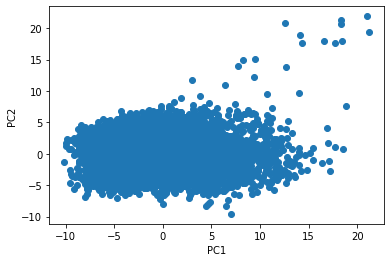

In [73]:
import matplotlib.pyplot as plt

# plot the transformed data along the principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [72]:
# get the names of the original features
feature_names = X_test_scaled.columns.tolist()

# get the names of the principal components
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

# create a dataframe containing the component loadings
component_loadings = pd.DataFrame(pca.components_, columns=feature_names, index=component_names)

# get the feature names with the highest loadings for each principal component
top_features = []
for i, component in enumerate(component_names):
    sorted_loadings = component_loadings.loc[component].abs().sort_values(ascending=False)
    top_feature_names = sorted_loadings.index[:3].tolist() # get the names of the top 3 features with highest loadings
    top_features.append(top_feature_names)

# print the names of the top 3 features for each principal component
for i, component in enumerate(component_names):
    print(f"{component}: {', '.join(top_features[i])}")

PC1: FWBscore, FWB1_1, FWB2_2
PC2: agecat, SOCSEC3, SOCSEC1
PC3: KHscore, LMscore, FSscore
PC4: MATHARDSHIP_1, MATHARDSHIP_2, MATHARDSHIP_5
PC5: MATERIALISM_3, MATERIALISM_1, MATERIALISM_2
PC6: PPMARIT, HOUSING, PPT612
PC7: PPHHSIZE, PPT18OV, PAIDHELP
PC8: PPT18OV, PPHHSIZE, MANAGE2
PC9: FINSOC2_2, INTERCONNECTIONS_10, FINSOC2_4
PC10: MATERIALISM_1, MATERIALISM_3, MATERIALISM_2
PC11: KIDS_1, PAIDHELP, MANAGE2
PC12: SHOCKS_12, PPREG9, PPREG4
PC13: PPREG9, PPREG4, PPETHM
PC14: VALUERANGES, MORTGAGE, HOUSERANGES
PC15: KH5correct, KHKNOWL5, KIDS_1
PC16: MORTGAGE, VALUERANGES, HOUSERANGES
PC17: PPREG4, PPREG9, MATERIALISM_2
PC18: SHOCKS_12, FS2_3, SWB_2
PC19: FINKNOWL1, FK1correct, LMscore
PC20: KH5correct, FINKNOWL1, FK1correct


In [75]:
pca = PCA(n_components=20)
pca.fit(X_test_scaled)
X_new = pca.transform(X_test_scaled)
feature_names = X_test_scaled.columns.tolist()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]
component_loadings = pd.DataFrame(pca.components_, columns=feature_names, index=component_names)
top_features = []
for i, component in enumerate(component_names):
    sorted_loadings = component_loadings.loc[component].abs().sort_values(ascending=False)
    top_feature_names = sorted_loadings.index.tolist() # get the names of all features sorted by their loading scores
    for feature in top_feature_names:
        if feature not in top_features:
            top_features.append(feature)
            break
        else:
            continue
    if len(top_features) == 20: # stop when we have 20 unique features
        break
print(f"Top 20 features: {', '.join(top_features)}")

Top 20 features: FWBscore, SOCSEC3, FSscore, MATHARDSHIP_1, MATERIALISM_3, PPHHSIZE, FINKNOWL3, FINSOC2_2, KHKNOWL4, KIDS_1, KIDS_4, PPT01, Military_Status, KH9correct, SHOCKS_8, PPREG4, FK1correct, MATERIALISM_1, FINKNOWL1, FS2_2


# MODELS!!!! 

In [33]:
# Random forest model
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
target = 'PRODUSE_3'
predictor = data.drop(target, axis=1).columns
X_train, X_test, y_train, y_test = train_test_split(data[predictor], data[target], test_size=0.2, random_state=42)

# CLASSIFIERS!!!!!
# initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
accuracy = rf_clf.score(X_test, y_test)
print(f'Random Forest Classifier Accuracy: {accuracy}')

# initialize the model
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf = ada_clf.fit(X_train, y_train)
accuracy = ada_clf.score(X_test, y_test)
print(f'AdaBoost Classifier Accuracy: {accuracy}')

# svm classifier
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)
accuracy = svm_clf.score(X_test, y_test)
print(f'SVM Classifier Accuracy: {accuracy}')

# gradient boost classifier
xgb_clf = XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
accuracy = xgb_clf.score(X_test, y_test)
print(f'Gradient Boost Classifier Accuracy: {accuracy}')

# REGRESSOR!!!
# initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg = rf_reg.fit(X_train, y_train)
accuracy = rf_reg.score(X_test, y_test)
print(f'Random Forest Regressor Accuracy: {accuracy}')

# AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_reg = ada_reg.fit(X_train, y_train)
accuracy = ada_reg.score(X_test, y_test)
print(f'AdaBoost Regressor Accuracy: {accuracy}')

# # Logit 
# log_reg = LogisticRegression()
# log_reg = log_reg.fit(X_train, y_train)
# accuracy = log_reg.score(X_test, y_test)
# print(f'LogisticRegression Accuracy: {accuracy}')

# svm
svm_reg = svm.SVR()
svm_reg = svm_reg.fit(X_train, y_train)
accuracy = svm_reg.score(X_test, y_test)
print(f'SVM Regressor Accuracy: {accuracy}')

# xga boost regressor
xga_reg = XGBRegressor()
xga_reg = xga_reg.fit(X_train, y_train)
accuracy = xga_reg.score(X_test, y_test)
print(f'XGB Regressor Accuracy: {accuracy}')



Random Forest Classifier Accuracy: 0.9171227521501173
AdaBoost Classifier Accuracy: 0.9616888193901486
SVM Classifier Accuracy: 0.9171227521501173
Gradient Boost Classifier Accuracy: 0.9788897576231431
Random Forest Regressor Accuracy: 0.7986699826279979
AdaBoost Regressor Accuracy: 0.46616774668580574
SVM Regressor Accuracy: 0.013356356180483586
XGB Regressor Accuracy: 0.7667271413605117


In [80]:
X_train_scaled_new = X_train_scaled[['LMscore', 'FINKNOWL1', 'FINKNOWL3', 'KH4correct', 'KH6correct', 'KH7correct', 'PRODUSE_1', 'PRODUSE_2', 'PRODUSE_4', 'PRODUSE_5', 'PRODUSE_6', 'SHOCKS_3', 'SHOCKS_4', 'SHOCKS_5', 'SHOCKS_8', 'SHOCKS_10', 'SHOCKS_12', 'INTERCONNECTIONS_9', 'EMPLOY1_6', 'EMPLOY1_9']]
X_test_scaled_new = X_test_scaled[['LMscore', 'FINKNOWL1', 'FINKNOWL3', 'KH4correct', 'KH6correct', 'KH7correct', 'PRODUSE_1', 'PRODUSE_2', 'PRODUSE_4', 'PRODUSE_5', 'PRODUSE_6', 'SHOCKS_3', 'SHOCKS_4', 'SHOCKS_5', 'SHOCKS_8', 'SHOCKS_10', 'SHOCKS_12', 'INTERCONNECTIONS_9', 'EMPLOY1_6', 'EMPLOY1_9']]

In [81]:
# Random forest model
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# # Split the data into training and test sets
# target = 'PRODUSE_3'
# # predictor = data.drop(target, axis=1).columns
# # ridge regression
# predictor = data[['LMscore', 'FINKNOWL1', 'FINKNOWL3', 'KH4correct', 'KH6correct', 'KH7correct', 'PRODUSE_1', 'PRODUSE_2', 'PRODUSE_4', 'PRODUSE_5', 'PRODUSE_6', 'SHOCKS_3', 'SHOCKS_4', 'SHOCKS_5', 'SHOCKS_8', 'SHOCKS_10', 'SHOCKS_12', 'INTERCONNECTIONS_9', 'EMPLOY1_6', 'EMPLOY1_9']]
# X_train, X_test, y_train, y_test = train_test_split(predictor, data[target], test_size=0.2, random_state=42)

X_train = X_train_scaled_new
X_test = X_test_scaled_new

# CLASSIFIERS!!!!!
# initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
accuracy = rf_clf.score(X_test, y_test)
print(f'Random Forest Classifier Accuracy: {accuracy}')

# initialize the model
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf = ada_clf.fit(X_train, y_train)
accuracy = ada_clf.score(X_test, y_test)
print(f'AdaBoost Classifier Accuracy: {accuracy}')

# svm classifier
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)
accuracy = svm_clf.score(X_test, y_test)
print(f'SVM Classifier Accuracy: {accuracy}')

# gradient boost classifier
xgb_clf = XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
accuracy = xgb_clf.score(X_test, y_test)
print(f'Gradient Boost Classifier Accuracy: {accuracy}')

# REGRESSOR!!!
# initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg = rf_reg.fit(X_train, y_train)
accuracy = rf_reg.score(X_test, y_test)
print(f'Random Forest Regressor Accuracy: {accuracy}')

# AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_reg = ada_reg.fit(X_train, y_train)
accuracy = ada_reg.score(X_test, y_test)
print(f'AdaBoost Regressor Accuracy: {accuracy}')

# # Logit 
# log_reg = LogisticRegression()
# log_reg = log_reg.fit(X_train, y_train)
# accuracy = log_reg.score(X_test, y_test)
# print(f'LogisticRegression Accuracy: {accuracy}')

# svm
svm_reg = svm.SVR()
svm_reg = svm_reg.fit(X_train, y_train)
accuracy = svm_reg.score(X_test, y_test)
print(f'SVM Regressor Accuracy: {accuracy}')

# xga boost regressor
xga_reg = XGBRegressor()
xga_reg = xga_reg.fit(X_train, y_train)
accuracy = xga_reg.score(X_test, y_test)
print(f'XGB Regressor Accuracy: {accuracy}')



Random Forest Classifier Accuracy: 0.9741985926505082
AdaBoost Classifier Accuracy: 0.9616888193901486
SVM Classifier Accuracy: 0.9765441751368257
Gradient Boost Classifier Accuracy: 0.9741985926505082
Random Forest Regressor Accuracy: 0.7165282754902987
AdaBoost Regressor Accuracy: 0.5214912368963792
SVM Regressor Accuracy: 0.6480097648032789
XGB Regressor Accuracy: 0.6688229239223686


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# y = data["outcome_variable"]
model = sm.OLS(y_train, X_train_scaled_new).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = X_train_scaled_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_new.values, i) for i in range(X_train_scaled_new.shape[1])]

# Print variables with high VIF values
print(vif[vif["VIF"] < 5])

             variables       VIF
0              LMscore  3.177119
1            FINKNOWL1  1.722396
2            FINKNOWL3  2.239737
3           KH4correct  1.110130
4           KH6correct  1.166200
5           KH7correct  1.098375
6            PRODUSE_1  1.192454
7            PRODUSE_2  1.109299
8            PRODUSE_4  1.274139
9            PRODUSE_5  1.490234
10           PRODUSE_6  2.239830
11            SHOCKS_3  1.030497
12            SHOCKS_4  1.377727
13            SHOCKS_5  1.221872
14            SHOCKS_8  1.023047
15           SHOCKS_10  1.051374
16           SHOCKS_12  1.730585
17  INTERCONNECTIONS_9  1.017002
18           EMPLOY1_6  1.036898
19           EMPLOY1_9  1.059743


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# y = data["outcome_variable"]
model = sm.OLS(y_train, X_train).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print variables with high VIF values
print(vif[vif["VIF"] < 5])

             variables       VIF
0              LMscore  3.177119
1            FINKNOWL1  1.722396
2            FINKNOWL3  2.239737
3           KH4correct  1.110130
4           KH6correct  1.166200
5           KH7correct  1.098375
6            PRODUSE_1  1.192454
7            PRODUSE_2  1.109299
8            PRODUSE_4  1.274139
9            PRODUSE_5  1.490234
10           PRODUSE_6  2.239830
11            SHOCKS_3  1.030497
12            SHOCKS_4  1.377727
13            SHOCKS_5  1.221872
14            SHOCKS_8  1.023047
15           SHOCKS_10  1.051374
16           SHOCKS_12  1.730585
17  INTERCONNECTIONS_9  1.017002
18           EMPLOY1_6  1.036898
19           EMPLOY1_9  1.059743


INTERCONNECTIONS_9 : IF YOU ARE GOVERNMENT OR NOT

EMPLOY1_6: Permanently sick, disabled or unable to work (cannot use!)


# TRY OUT REMOVING THE BIASED FEATURES
# ENSURE FEATURES CAN BE USED FOR PREDICTING

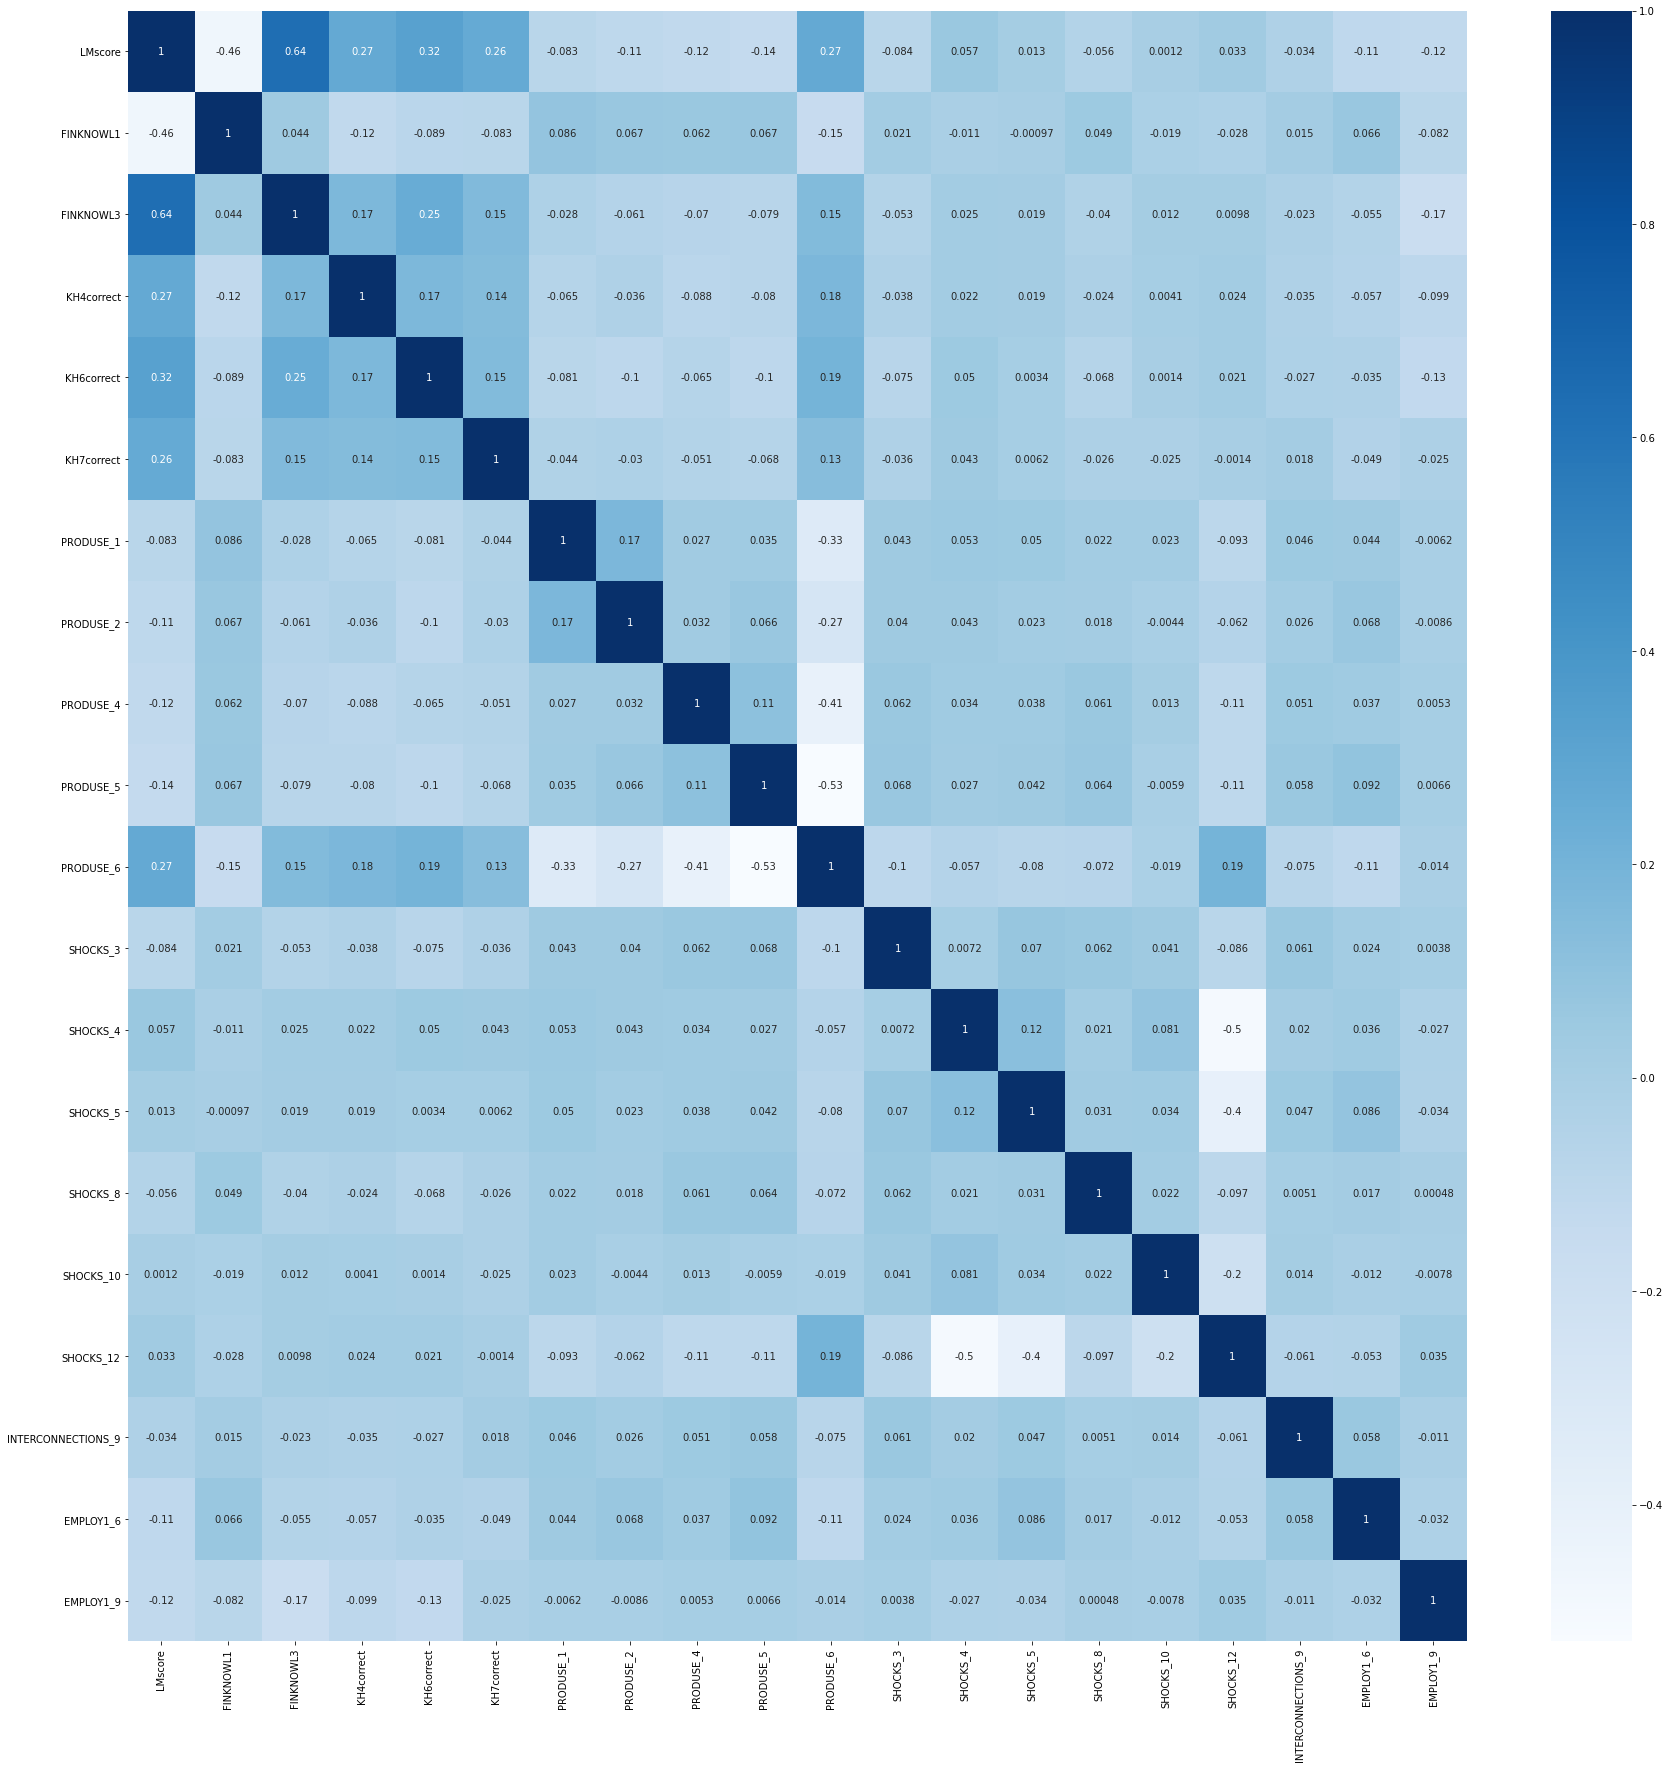

In [90]:
import seaborn as sns
# heatmap
sns.heatmap(X_train.corr(),annot=True, cmap='Blues')
plt.gcf().set_size_inches(30, 30)

In [43]:
# Random forest model
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
target = 'PRODUSE_3'
# predictor = data.drop(target, axis=1).columns
# ridge regression
predictor = data[['LMscore', 'FINKNOWL1', 'FINKNOWL3', 'KH4correct', 'KH6correct', 'KH7correct', 'PRODUSE_1', 'PRODUSE_2', 'PRODUSE_4', 'PRODUSE_5', 'PRODUSE_6', 'SHOCKS_3', 'SHOCKS_4', 'SHOCKS_5', 'SHOCKS_8', 'SHOCKS_10', 'SHOCKS_12', 'INTERCONNECTIONS_9', 'EMPLOY1_6', 'EMPLOY1_9']]
X_train, X_test, y_train, y_test = train_test_split(predictor, data[target], test_size=0.2, random_state=42)

# CLASSIFIERS!!!!!
# initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
accuracy = rf_clf.score(X_test, y_test)
print(f'Random Forest Classifier Accuracy: {accuracy}')

# initialize the model
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf = ada_clf.fit(X_train, y_train)
accuracy = ada_clf.score(X_test, y_test)
print(f'AdaBoost Classifier Accuracy: {accuracy}')

# svm classifier
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)
accuracy = svm_clf.score(X_test, y_test)
print(f'SVM Classifier Accuracy: {accuracy}')

# gradient boost classifier
xgb_clf = XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
accuracy = xgb_clf.score(X_test, y_test)
print(f'Gradient Boost Classifier Accuracy: {accuracy}')

# REGRESSOR!!!
# initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg = rf_reg.fit(X_train, y_train)
accuracy = rf_reg.score(X_test, y_test)
print(f'Random Forest Regressor Accuracy: {accuracy}')

# AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_reg = ada_reg.fit(X_train, y_train)
accuracy = ada_reg.score(X_test, y_test)
print(f'AdaBoost Regressor Accuracy: {accuracy}')

# # Logit 
# log_reg = LogisticRegression()
# log_reg = log_reg.fit(X_train, y_train)
# accuracy = log_reg.score(X_test, y_test)
# print(f'LogisticRegression Accuracy: {accuracy}')

# svm
svm_reg = svm.SVR()
svm_reg = svm_reg.fit(X_train, y_train)
accuracy = svm_reg.score(X_test, y_test)
print(f'SVM Regressor Accuracy: {accuracy}')

# xga boost regressor
xga_reg = XGBRegressor()
xga_reg = xga_reg.fit(X_train, y_train)
accuracy = xga_reg.score(X_test, y_test)
print(f'XGB Regressor Accuracy: {accuracy}')



Random Forest Classifier Accuracy: 0.9741985926505082
AdaBoost Classifier Accuracy: 0.9616888193901486
SVM Classifier Accuracy: 0.9788897576231431
Gradient Boost Classifier Accuracy: 0.9741985926505082
Random Forest Regressor Accuracy: 0.716179385244579
AdaBoost Regressor Accuracy: 0.5214912368963792
SVM Regressor Accuracy: 0.6448562781584237
XGB Regressor Accuracy: 0.6687163523957949


In [45]:
# Random forest model
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
target = 'PRODUSE_3'
# predictor = data.drop(target, axis=1).columns
# pca analysis
predictor = data[['SOCSEC3', 'SAVINGSRANGES', 'LIFEEXPECT', 'CONNECT', 'HOUSERANGES', 'MORTGAGE', 'VALUERANGES', 'FWBscore', 'SOCSEC2', 'EMPLOY', 'FSscore', 'AUTOMATED_1', 'PPREG9', 'PPINCIMP', 'SWB_3', 'FRAUD2', 'SUBNUMERACY2', 'CHANGEABLE', 'MATERIALISM_3', 'AUTOMATED_2']]
X_train, X_test, y_train, y_test = train_test_split(predictor, data[target], test_size=0.2, random_state=42)

# CLASSIFIERS!!!!!
# initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
accuracy = rf_clf.score(X_test, y_test)
print(f'Random Forest Classifier Accuracy: {accuracy}')

# initialize the model
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf = ada_clf.fit(X_train, y_train)
accuracy = ada_clf.score(X_test, y_test)
print(f'AdaBoost Classifier Accuracy: {accuracy}')

# svm classifier
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)
accuracy = svm_clf.score(X_test, y_test)
print(f'SVM Classifier Accuracy: {accuracy}')

# gradient boost classifier
xgb_clf = XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
accuracy = xgb_clf.score(X_test, y_test)
print(f'Gradient Boost Classifier Accuracy: {accuracy}')

# REGRESSOR!!!
# initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg = rf_reg.fit(X_train, y_train)
accuracy = rf_reg.score(X_test, y_test)
print(f'Random Forest Regressor Accuracy: {accuracy}')

# AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_reg = ada_reg.fit(X_train, y_train)
accuracy = ada_reg.score(X_test, y_test)
print(f'AdaBoost Regressor Accuracy: {accuracy}')

# # Logit 
# log_reg = LogisticRegression()
# log_reg = log_reg.fit(X_train, y_train)
# accuracy = log_reg.score(X_test, y_test)
# print(f'LogisticRegression Accuracy: {accuracy}')

# svm
svm_reg = svm.SVR()
svm_reg = svm_reg.fit(X_train, y_train)
accuracy = svm_reg.score(X_test, y_test)
print(f'SVM Regressor Accuracy: {accuracy}')

# xga boost regressor
xga_reg = XGBRegressor()
xga_reg = xga_reg.fit(X_train, y_train)
accuracy = xga_reg.score(X_test, y_test)
print(f'XGB Regressor Accuracy: {accuracy}')



Random Forest Classifier Accuracy: 0.9171227521501173
AdaBoost Classifier Accuracy: 0.9155590304925724
SVM Classifier Accuracy: 0.9171227521501173
Gradient Boost Classifier Accuracy: 0.9132134480062549
Random Forest Regressor Accuracy: -0.017824287024079455
AdaBoost Regressor Accuracy: 0.023171080165045543
SVM Regressor Accuracy: -0.0017913692980229268
XGB Regressor Accuracy: -0.14875606710104994


# ANN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
# layer in sequential
# shape is the number of timesteps -- 60
# return_sequences - false is 2D array trye gives out the batch size with time steps, everything but the last layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# to reduce overfitting
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=12)

Epoch 1/50


ValueError: in user code:

    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/vedanshi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 20)


In [ ]:
# compare predicted and actual stock prices in test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = dataset_test[['Open']]

dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
# get list of prices
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

# scale test data using the train data scaler -- transform insead of 
# fit_transform to use the same scaler
inputs_scaled = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = dataset_test.iloc[:, 1:2].values
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()